In [28]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import requests
import json
from census import Census
import hvplot.pandas
from scipy.stats import linregress
import time
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


# Create an instance of the Census library



In [29]:
data_file = Path("Resources/car_sales_clean.csv")

In [30]:
# Use Pandas to the read data.
data_file_df = pd.read_csv(data_file)
data_file_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan


In [31]:
# Pull the regional sales data by state  
count = data_file_df["state"].value_counts()
count

state
fl    75243
ca    66213
tx    41657
ga    30939
pa    24117
nj    23003
il    21494
oh    20294
tn    19183
nc    18731
mo    15286
mi    14185
nv    11682
md     9788
va     9448
wi     9196
mn     8627
az     7612
wa     7012
co     6270
ma     6167
ny     4749
in     3879
sc     3754
ne     3685
pr     2427
la     1744
ms     1730
ut     1716
hi     1205
or     1047
nm      163
ok       54
al       25
Name: count, dtype: int64

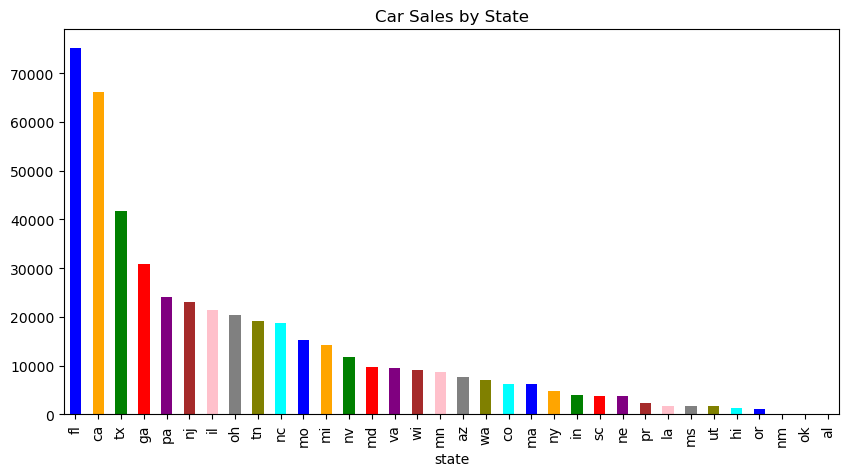

In [32]:
#create a histogram to show the distribution of sales by state
count.plot(kind='bar', figsize=(10,5), color= colors, title='Car Sales by State')
plt.show()


In [33]:
#calculate average selling price by state
average_selling_price = data_file_df.groupby('state')['sellingprice'].mean()
average_selling_price

state
al     9440.000000
az    12168.611403
ca    14895.258650
co    15745.498405
fl    14331.417953
ga    12840.065257
hi    12366.514523
il    15404.136968
in    10959.654550
la    11159.715023
ma     6787.895249
md     7713.595729
mi    15182.068946
mn    14313.545844
mo    14694.777771
ms    11502.419075
nc     8696.677967
ne    13242.496608
nj    13621.127896
nm     6479.754601
nv    15576.319380
ny    12589.252685
oh    14459.130975
ok     7448.148148
or    11959.574976
pa    14007.944769
pr     9755.170993
sc    10747.556473
tn    17285.152896
tx    13574.509302
ut    12491.601981
va     8416.669983
wa    14327.867798
wi    14105.263810
Name: sellingprice, dtype: float64

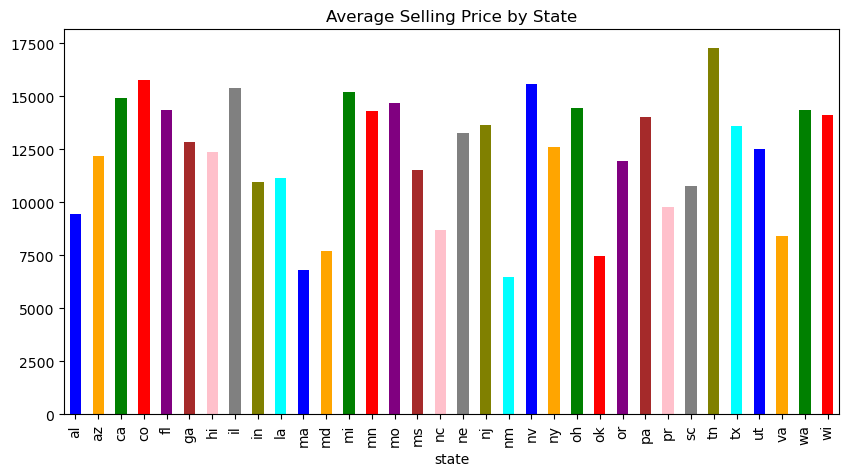

In [34]:
#plot the average selling price by state
average_selling_price.plot(kind='bar', figsize=(10,5), color=colors, title='Average Selling Price by State')
plt.show()

In [35]:
coordinates = {
    "State": ["Alabama","Arizona","California","Colorado","Florida","Georgia","Hawaii","Illinois","Indiana","Louisiana","Maryland","Michigan","Minnesota","Missouri","Mississippi","North Carolina","Nebraska","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","South Carolina","Tennessee","Texas","Utah","Virginia","Washington","Wisconsin"],
    "latitude": [32.318230,34.048927,36.778259,39.113014,27.994402,33.247875,19.741755,40.000000,40.273502,30.391830,39.045753,44.182205,46.392410,38.573936,33.000000,35.782169,41.492537,39.833851,34.307144,39.876019,43.299428,40.417287,36.084621,43.804133,41.203323,18.220833,33.836082,35.860119,31.000000,39.419220,37.926868,47.751076,44.500000],
    "longitude": [-86.902298,-111.093735,-119.417931,-105.358887,-81.760254,-83.441162,-155.844437,-89.000000,-86.126976,-91.187470,-76.641273,-84.506836,-94.636230,-92.603760,-90.000000,-80.793457,-99.901810,-74.405661,-106.018066,-116.419389,-74.217933,-82.907120,-96.921387,-120.554153,-77.194527,-66.590149,-81.163727,-86.580447,-100.000000,-111.888237,-78.898619,-120.740139,-89.500000],
    "Sales": [count["al"],count["az"],count["ca"],count["co"],count["fl"],count["ga"],count["hi"],count["il"],count["in"],count["la"],count["md"],count["mi"],count["mn"],count["mo"],count["ms"],count["nc"],count["ne"],count["nj"],count["nm"],count["nv"],count["ny"],count["oh"],count["ok"],count["or"],count["pa"],count["pr"],count["sc"],count["tn"],count["tx"],count["ut"],count["va"],count["wa"],count["wi"]],
    "Average Selling Price": [average_selling_price["al"],average_selling_price["az"],average_selling_price["ca"],average_selling_price["co"],average_selling_price["fl"],average_selling_price["ga"],average_selling_price["hi"],average_selling_price["il"],average_selling_price["in"],average_selling_price["la"],average_selling_price["md"],average_selling_price["mi"],average_selling_price["mn"],average_selling_price["mo"],average_selling_price["ms"],average_selling_price["nc"],average_selling_price["ne"],average_selling_price["nj"],average_selling_price["nm"],average_selling_price["nv"],average_selling_price["ny"],average_selling_price["oh"],average_selling_price["ok"],average_selling_price["or"],average_selling_price["pa"],average_selling_price["pr"],average_selling_price["sc"],average_selling_price["tn"],average_selling_price["tx"],average_selling_price["ut"],average_selling_price["va"],average_selling_price["wa"],average_selling_price["wi"]]
}


In [36]:
coordinates_df = pd.DataFrame(coordinates)
coordinates_df["Average Selling Price"] = coordinates_df["Average Selling Price"].map("${:,.2f}".format)
coordinates_df

,State,latitude,longitude,Sales,Average Selling Price
0,Alabama,32.318230,-86.902298,25,"$9,440.00"
1,Arizona,34.048927,-111.093735,7612,"$12,168.61"
2,California,36.778259,-119.417931,66213,"$14,895.26"
3,Colorado,39.113014,-105.358887,6270,"$15,745.50"
4,Florida,27.994402,-81.760254,75243,"$14,331.42"
5,Georgia,33.247875,-83.441162,30939,"$12,840.07"
6,Hawaii,19.741755,-155.844437,1205,"$12,366.51"
7,Illinois,40.000000,-89.000000,21494,"$15,404.14"
8,Indiana,40.273502,-86.126976,3879,"$10,959.65"
9,Louisiana,30.391830,-91.187470,1744,"$11,159.72"


In [37]:
coordinates_df.to_csv("coordinates_df.csv", encoding="utf-8", index=False, header=True)

In [38]:
us_plot = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 1200,
    frame_height = 800,
    size = "Sales",
    scale = 0.2,
    color = "State",
    hover_cols = ["State","Sales","Average Selling Price"]
)
us_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (State,Sales,Average Selling Price)

In [39]:
mainland_df = coordinates_df.drop(labels=[6, 25])
mainland_df

,State,latitude,longitude,Sales,Average Selling Price
0,Alabama,32.318230,-86.902298,25,"$9,440.00"
1,Arizona,34.048927,-111.093735,7612,"$12,168.61"
2,California,36.778259,-119.417931,66213,"$14,895.26"
3,Colorado,39.113014,-105.358887,6270,"$15,745.50"
4,Florida,27.994402,-81.760254,75243,"$14,331.42"
5,Georgia,33.247875,-83.441162,30939,"$12,840.07"
7,Illinois,40.000000,-89.000000,21494,"$15,404.14"
8,Indiana,40.273502,-86.126976,3879,"$10,959.65"
9,Louisiana,30.391830,-91.187470,1744,"$11,159.72"
10,Maryland,39.045753,-76.641273,9788,"$7,713.60"


In [40]:
mainland_plot = mainland_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 1200,
    frame_height = 800,
    size = "Sales",
    scale = 0.2,
    color = "State"
)
mainland_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (State,Sales)